# Problem Statement

In this project we want to predict the order patterns for various restaurants using time-series forecasting. We want to explore different time-series forecasting models to understand and analyse the order patterns for specific SKUs for a particular restaurant and determine the perfect model for the use case.



# Why is it crucial?

The models can help figure out patterns based on order volume, weather conditions, order type etc. which can then help in making better business decisions and rectifying flaws is any. Furthermore, we want to leverage recommendation system to enhance the user experience.



# Data Retrival - Importing the Dataset Using URL


In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt


# Step 1: Download the dataset from Kaggle
os.system('kaggle datasets download -d gauravmalik26/food-delivery-dataset')

# Step 2: Extract the ZIP file
with zipfile.ZipFile('food-delivery-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('food_delivery_dataset')

# Step 3: List the files in the extracted directory to find the correct CSV file name
extracted_dir = 'food_delivery_dataset'
files = os.listdir(extracted_dir)
print("Extracted files:", files)

# Step 4: Use the correct file from the extracted list
csv_file_path = f"{extracted_dir}/train.csv"  # Replace with 'train.csv' since it's one of the files

# Step 5: Create a DataFrame from the extracted CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())


/Users/rohitbanka/Desktop/DIC_Project/Forcaster/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Dataset URL: https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset
License(s): other


100%|██████████| 1.95M/1.95M [00:00<00:00, 5.61MB/s]



Extracted files: ['test.csv', 'train.csv', 'Sample_Submission.csv']
        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery

# Data Cleaning

The data cleaning steps that we have followed are -

1. Replacing "Nan" text with actual Nan values and replacing values accordingly. (Replacing values is different for different columns)
2. Removing duplicates
3. Replacing Nan in Delivery Person Age with an average value for the complete dataset.
4. Replacing Nan in Delivery Person Rating with an average value for the complete dataset and rounded to single decimal place.
5. Replace Nan values for Multiple Deliveries with the most frequent values. The values are 0,1,2,3
6. Replace the value with the average of the difference. You need to subtract the average time difference from the Time Packed.
7. Calculate the range of values for Latitude and Longitude. Replace the 0 values.
8. Replace each column with a random value from the range. Make sure to add float values with 4 decimal points.
9. Convert the data type accordingly (String to Float for Rating, Latitide and Longitude, String to Int for multiple deliveries, Removed (min) prefix from Time Taken)
10. Handled Outliers for various columns

In [2]:
# Replacing 'NaN' with NaN.
df = df.replace('NaN', np.nan, regex=True)

print("Finding SUM of Nan values")
# Finding the count of NaN for each column
print(df.isna().sum())
print("------------------------")
print("Finding SUM of 0 values")
# Finding columns with count as 0.
print((df == 0).sum())

Finding SUM of Nan values
ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64
------------------------
Finding SUM of 0 values
ID                                 0
Delivery_person_ID                 0
Delivery_person_Age                0
Delivery_person_Ratings            0
Restaurant_latitude             3640
Restaur

In [3]:
threshold = 0.01

# Task 1: Identify the valid range for Restaurant Latitude and Longitude
valid_restaurant_latitude = df[df['Restaurant_latitude'] > threshold]['Restaurant_latitude']
valid_restaurant_longitude = df[df['Restaurant_longitude'] > threshold]['Restaurant_longitude']

# Task 2: Identify the valid range for Delivery Latitude and Longitude
valid_delivery_latitude = df[df['Delivery_location_latitude'] > threshold]['Delivery_location_latitude']
valid_delivery_longitude = df[df['Delivery_location_longitude'] > threshold]['Delivery_location_longitude']

# Task 3: Calculate the min and max for each of the valid columns
min_rest_lat, max_rest_lat = valid_restaurant_latitude.min(), valid_restaurant_latitude.max()
min_rest_long, max_rest_long = valid_restaurant_longitude.min(), valid_restaurant_longitude.max()
min_del_lat, max_del_lat = valid_delivery_latitude.min(), valid_delivery_latitude.max()
min_del_long, max_del_long = valid_delivery_longitude.min(), valid_delivery_longitude.max()

# Task 4: Replace zero or near-zero values with random values from the respective range
df['Restaurant_latitude'] = df['Restaurant_latitude'].apply(
    lambda x: round(np.random.uniform(min_rest_lat, max_rest_lat), 4) if x <= threshold else x
)
df['Restaurant_longitude'] = df['Restaurant_longitude'].apply(
    lambda x: round(np.random.uniform(min_rest_long, max_rest_long), 4) if x <= threshold else x
)
df['Delivery_location_latitude'] = df['Delivery_location_latitude'].apply(
    lambda x: round(np.random.uniform(min_del_lat, max_del_lat), 4) if x <= threshold else x
)
df['Delivery_location_longitude'] = df['Delivery_location_longitude'].apply(
    lambda x: round(np.random.uniform(min_del_long, max_del_long), 4) if x <= threshold else x
)

# Display the updated DataFrame
print(df[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']])

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471                   22.765049   
1                12.913041             77.683237                   13.043041   
2                12.914264             77.678400                   12.924264   
3                11.003669             76.976494                   11.053669   
4                12.972793             80.249982                   13.012793   
...                    ...                   ...                         ...   
45588            26.902328             75.794257                   26.912328   
45589            18.135600             74.853900                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude  
0 

In [4]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')

# Step 1: Calculate the time difference where "Time Ordered" is not NULL
df['Time_Difference'] = df['Time_Order_picked'] - df['Time_Orderd']

# Step 2: Calculate the average time difference (exclude rows where Time Ordered is NULL)
average_time_diff = df['Time_Difference'].mean()

# Step 3: Replace NULL values in "Time Ordered" by subtracting the average time difference from "Time Packed"
df['Time_Orderd'] = df.apply(
    lambda row: row['Time_Order_picked'] - average_time_diff if pd.isnull(row['Time_Orderd']) else row['Time_Orderd'],
    axis=1
)

# Drop the Time_Difference column if it's no longer needed
df.drop('Time_Difference', axis=1, inplace=True)

# Display the updated DataFrame
print(df[['Time_Orderd', 'Time_Order_picked']])

/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_79690/92946802.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')
/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_79690/92946802.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')


              Time_Orderd   Time_Order_picked
0     2024-12-01 11:30:00 2024-12-01 11:45:00
1     2024-12-01 19:45:00 2024-12-01 19:50:00
2     2024-12-01 08:30:00 2024-12-01 08:45:00
3     2024-12-01 18:00:00 2024-12-01 18:10:00
4     2024-12-01 13:30:00 2024-12-01 13:45:00
...                   ...                 ...
45588 2024-12-01 11:35:00 2024-12-01 11:45:00
45589 2024-12-01 19:55:00 2024-12-01 20:10:00
45590 2024-12-01 23:50:00 2024-12-01 00:05:00
45591 2024-12-01 13:35:00 2024-12-01 13:40:00
45592 2024-12-01 17:10:00 2024-12-01 17:15:00

[45593 rows x 2 columns]


In [5]:
#Convert 'Delivery_person_Age' to numeric
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')

#Replace null values in 'Delivery_person_Age' with the average
Average_age = df['Delivery_person_Age'].mean()
df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(int(Average_age))

#Convert 'Delivery_person_Ratings' to numeric
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')

#Replace null values in 'Delivery_person_Ratings' with average(1 decimal point)
Average_rating = df['Delivery_person_Ratings'].mean()
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(round(Average_rating, 1))

#Convert 'Delivery_person_Ratings' to numeric
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')

#Replace null values with the most frequent value which is the mode of the data
most_frequent_value = df['multiple_deliveries'].mode()[0]
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(most_frequent_value)

print(df.head())

        ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37.0                      4.9   
1  0xb379     BANGRES18DEL02                  34.0                      4.5   
2  0x5d6d     BANGRES19DEL01                  23.0                      4.4   
3  0x7a6a    COIMBRES13DEL02                  38.0                      4.7   
4  0x70a2     CHENRES12DEL01                  32.0                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date         Time_Orderd  \
0 

In [7]:
df.to_csv("clean_data.csv")

# Hypothesis 1.1 When the time taken for a delivery increaese the average rating decreases.

Here are are assuming that as the delivery time increases, the rating decreases.

Time_taken(min)    54
dtype: int64
Time_taken(min)    10
dtype: int64


<ipython-input-39-c1e6c1bc46e9>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_per_interval = time_taken.groupby('interval')['rating'].mean() - 4


<Axes: xlabel='interval'>

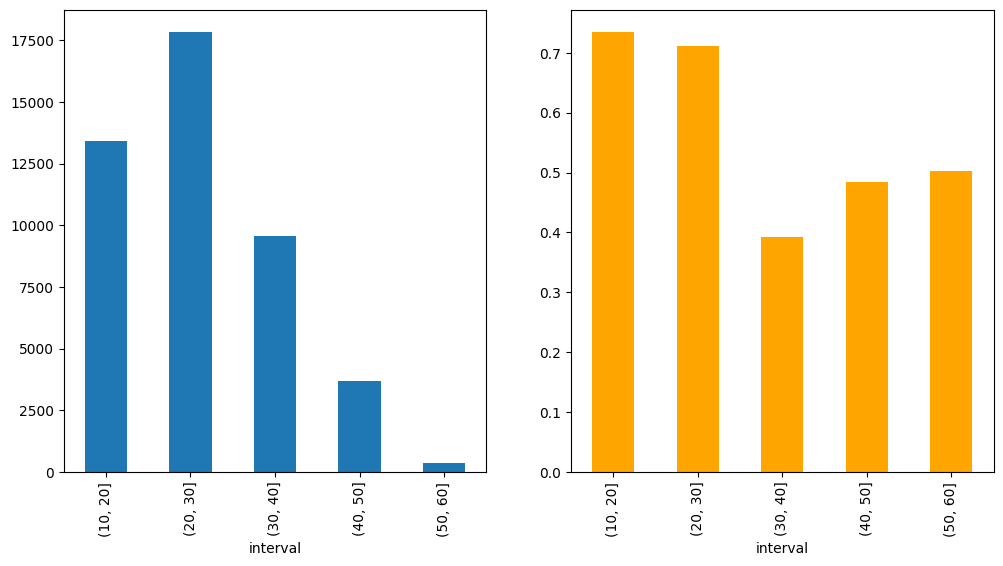

In [39]:
time_taken = df['Time_taken(min)'].str.split(" ").str[1]

time_taken = pd.DataFrame(time_taken)

time_taken["Time_taken(min)"] = time_taken["Time_taken(min)"].astype(int)

print(time_taken.max())
print(time_taken.min())

bins = [10, 20, 30, 40, 50 , 60]

time_taken['interval'] = pd.cut(time_taken["Time_taken(min)"], bins)

bin_count = time_taken['interval'].value_counts().sort_index()

time_taken['rating'] = df['Delivery_person_Ratings'].astype(float)

average_rating_per_interval = time_taken.groupby('interval')['rating'].mean() - 4

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bin_count.plot(kind='bar')
plt.subplot(1, 2, 2)
average_rating_per_interval.plot(kind='bar', color='orange')

As we can see on the left is the number of orders for different time intervals. As the time increases (in the right), we see the ratings gradually decrease.

# Hypothesis 1.2 As the distance increases, the delivery time increases

As the distance between the restaurant and the delivery place increases, time taken to deliver the order also increases.

<ipython-input-40-49795bb7a68b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_time_vs_distance['Distance_km'] = delivery_time_vs_distance.apply(lambda row: haversine(
<ipython-input-40-49795bb7a68b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_time_vs_distance['time_taken'] = df['Time_taken(min)'].str.split(" ").str[1]
<ipython-input-40-49795bb7a68b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<Axes: xlabel='interval'>

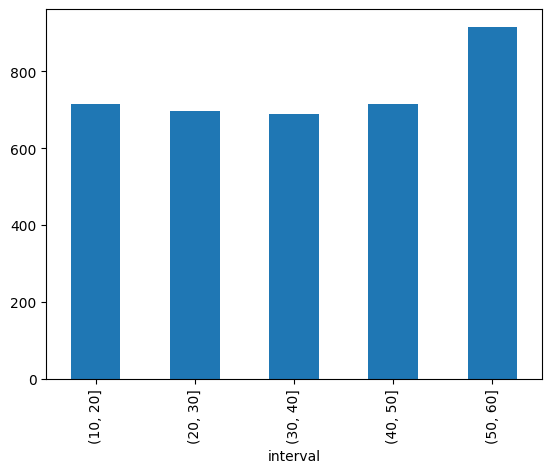

In [40]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

delivery_time_vs_distance = df[['Restaurant_latitude','Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude']]
delivery_time_vs_distance['Distance_km'] = delivery_time_vs_distance.apply(lambda row: haversine(
    row['Restaurant_latitude'],
    row['Restaurant_longitude'],
    row['Delivery_location_latitude'],
    row['Delivery_location_longitude']
), axis=1)

delivery_time_vs_distance['time_taken'] = df['Time_taken(min)'].str.split(" ").str[1]

df_replaced = df.replace('NaN', np.nan, regex=True)

df_dropped = df_replaced.dropna()

df_dropped['Time_Order_picked'] = pd.to_datetime(df_dropped['Time_Order_picked'])
df_dropped['Time_Orderd'] = pd.to_datetime(df_dropped['Time_Orderd'])


# result = (df_dropped['Time_Order_picked'] - df_dropped['Time_Orderd']).dt.total_seconds() / 60

delivery_time_vs_distance["time_taken"] = delivery_time_vs_distance["time_taken"].astype(float)

delivery_time_vs_distance["time_taken"] = delivery_time_vs_distance["time_taken"]

delivery_time_vs_distance['interval'] = pd.cut(delivery_time_vs_distance["time_taken"], bins)

average_distance_per_interval = delivery_time_vs_distance.groupby('interval')['Distance_km'].mean()


average_distance_per_interval.plot(kind='bar')

